<a href="https://colab.research.google.com/github/Gaurav-Bindal/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking EDA with Python**


## Loading Libraries and CSV 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 2 - Analytics Framework/EDA Capstone Project/Copy of Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.shape

(119390, 32)

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# filling null value
df['children'].fillna(df['children'].mean(),inplace=True)
df['country'].fillna("no country",inplace=True)
df['agent'].fillna("0",inplace=True)
df['company'].fillna("0",inplace=True)

In [12]:
#create a dataframe which only includes people who have arrived
hotel_arrival=df[df['is_canceled'] == 0]
hotel_arrival

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
# get the total number of hotel guests
total_guests = hotel_arrival['country'].value_counts().sum()
#counting the number of guests based on country
country_wise_guests = hotel_arrival['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
# add the proportion column
country_wise_guests['percentage'] = round(country_wise_guests['No of guests'] / total_guests * 100, 2)
country_wise_guests

,country,No of guests,percentage
0,PRT,21071,28.03
1,GBR,9676,12.87
2,FRA,8481,11.28
3,ESP,6391,8.50
4,DEU,6069,8.07
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


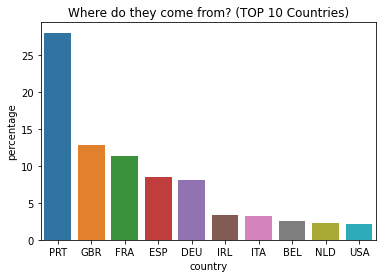

In [14]:
ax = sns.barplot(x="country", y="percentage", data=country_wise_guests[0:10]).set_title ('Where do they come from? (TOP 10 Countries)')

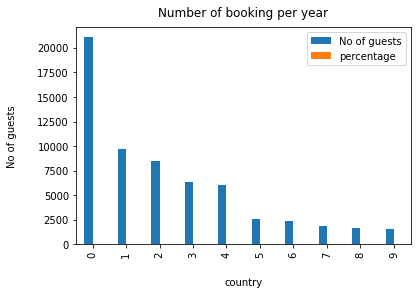

In [15]:
country_wise_guests.head(10).plot(kind='bar')

plt.xlabel("country", labelpad=20)
plt.ylabel("No of guests", labelpad=20)
plt.title("Number of booking per year", y=1.02);

In [17]:
YEAR = hotel_arrival['arrival_date_year'].value_counts().reset_index()
YEAR.columns = ['YEARS', 'No of guests']
YEAR

,YEARS,No of guests
0,2016,36370
1,2017,24942
2,2015,13854


In [18]:
year = hotel_arrival.groupby(['arrival_date_year'],as_index=False).size()
year.rename(columns={"size": "number_of_guest"}, inplace=True)
year['percentage'] = round(year['number_of_guest'] / total_guests * 100, 2)
year

,arrival_date_year,number_of_guest,percentage
0,2015,13854,18.43
1,2016,36370,48.39
2,2017,24942,33.18


Text(0.5, 1.0, 'Year of Arrival')

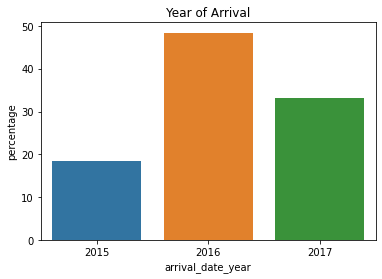

In [19]:
sns.barplot(x="arrival_date_year", y="percentage", data=year).set_title ('Year of Arrival')

**More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.**

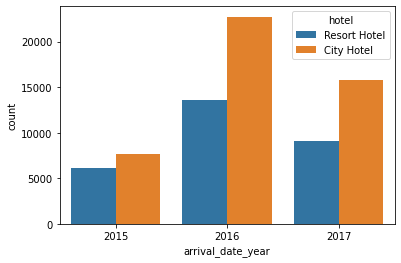

In [20]:
sns.countplot(x='arrival_date_year', hue='hotel',  data=hotel_arrival);

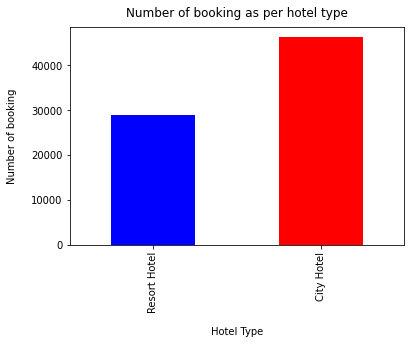

In [21]:
df[df['is_canceled'] == 0]['hotel'].value_counts(sort=False).plot(kind='bar', color=['blue', 'red'])

plt.xlabel("Hotel Type", labelpad=14)
plt.ylabel("Number of booking", labelpad=14)
plt.title("Number of booking as per hotel type", y=1.02);

In [22]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    75166
1    44224
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


**Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.**

In [23]:
total_booking_canceled = df.groupby(['hotel','is_canceled'], as_index=False).size()
total_booking_canceled.rename(columns={"size": "cancelled booking"}, inplace=True)
total_booking_canceled['percentage'] = round(total_booking_canceled['cancelled booking'] / total_guests * 100, 2)
total_booking_canceled

,hotel,is_canceled,cancelled booking,percentage
0,City Hotel,0,46228,61.50
1,City Hotel,1,33102,44.04
2,Resort Hotel,0,28938,38.50
3,Resort Hotel,1,11122,14.80


1 SHOWS THE NO OF CANCEL BOOKINGS AND FROM THIS WE GET THAT 37.07% PEOPLE CANCEL THERE BOOKING.

Text(0.5, 1.0, 'booked or not')

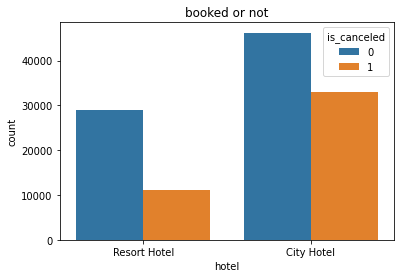

In [24]:
sns.countplot (x= 'hotel', data= df,hue= 'is_canceled').set_title ('booked or not')

In [25]:
hotel_arrival.meal.value_counts()

BB           57800
HB            9479
SC            6684
Undefined      883
FB             320
Name: meal, dtype: int64

Text(0.5, 1.0, 'breakest type in hotel')

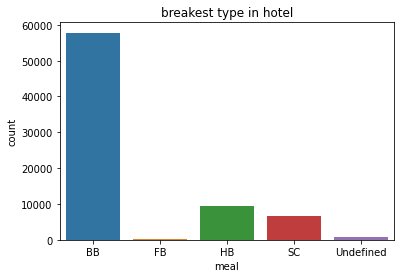

In [26]:
sns.countplot (x= 'meal', data= hotel_arrival).set_title ('breakest type in hotel')

**Bead and Breakfast, which is the most common meal basis encountered in hotels.**

Text(0.5, 1.0, 'repeated guest')

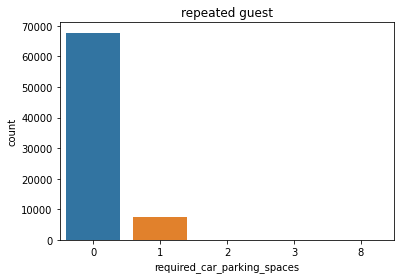

In [27]:
sns.countplot (x= 'required_car_parking_spaces',data= hotel_arrival).set_title ('repeated guest') 

In [ ]:
hotel_arrival['required_car_parking_spaces'].sum()

7457

In [ ]:
#Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

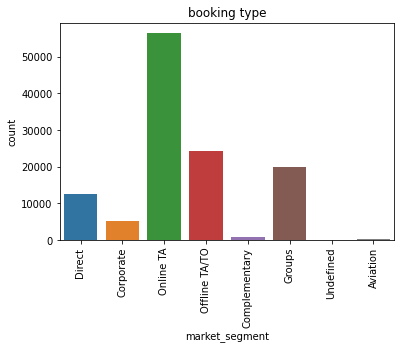

In [28]:
sns.countplot (x= 'market_segment', data= df).set_title ('booking type')
plt.xticks(rotation = 90)

In [29]:
#counting the number of guests by segment and hotel
market_segment = hotel_arrival.groupby(['hotel', 'market_segment'], as_index=False).size()

# rename a column
market_segment.rename(columns={"size": "number_of_guest"}, inplace=True)

# get the percentage
market_segment['percentage'] = round(market_segment['number_of_guest'] / total_guests * 100, 2)

market_segment

,hotel,market_segment,number_of_guest,percentage
0,City Hotel,Aviation,185,0.25
1,City Hotel,Complementary,478,0.64
2,City Hotel,Corporate,2345,3.12
3,City Hotel,Direct,5037,6.70
4,City Hotel,Groups,4352,5.79
5,City Hotel,Offline TA/TO,9574,12.74
6,City Hotel,Online TA,24257,32.27
7,Resort Hotel,Complementary,168,0.22
8,Resort Hotel,Corporate,1958,2.60
9,Resort Hotel,Direct,5635,7.50


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

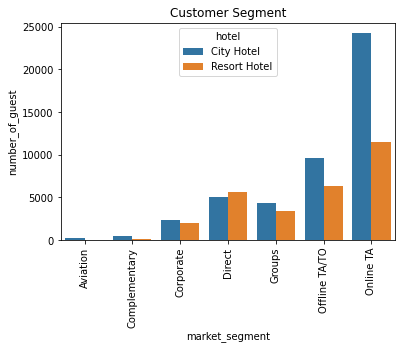

In [30]:
sns.barplot(x="market_segment", y="number_of_guest",hue='hotel', data=market_segment).set_title ('Customer Segment')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'How many are repeated customers')

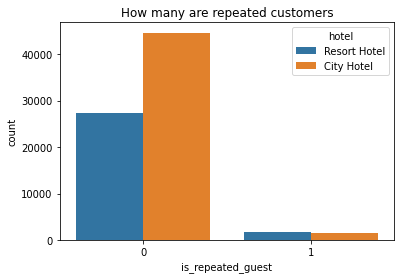

In [31]:
sns.countplot (x= 'is_repeated_guest', data= hotel_arrival,hue= 'hotel').set_title ('How many are repeated customers')